In [1]:
import numpy as np
from dezero import *
import dezero.functions as F
import dezero.utils as dzutils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
np.random.seed(0)
sigma = 1/2

x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    x = F.linear(x, W1, b1)
    x = F.sigmoid(x)
    x = F.linear(x, W2, b2)
    return x

lr = 0.2
iters = 10000
loss_trace = []

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
        
    W1.cleargrad()
    W2.cleargrad()
    b1.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    W2.data -= lr * W2.grad.data
    b1.data -= lr * b1.grad.data
    b2.data -= lr * b2.grad.data

    
    if i % 1000 == 0:
        loss_trace.append(loss.data)

Text(0, 0.5, 'loss')

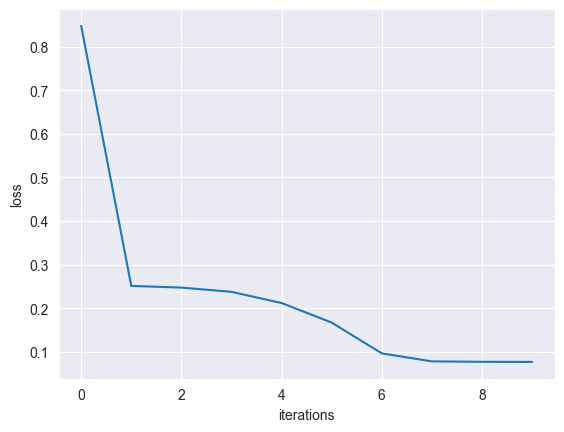

In [3]:
plt.plot(loss_trace)
plt.xlabel('iterations')
plt.ylabel('loss')

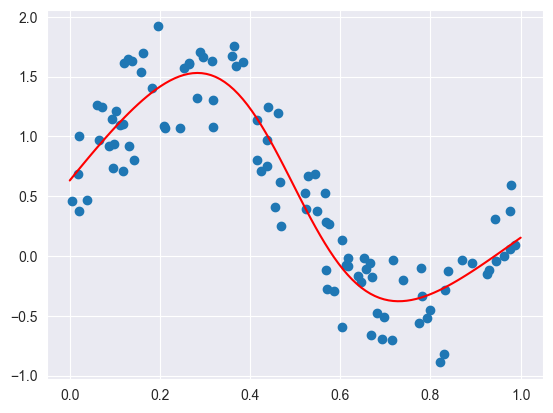

In [4]:
plt.scatter(x, y)
x = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(x, predict(x).data, label='prediction', color='red')

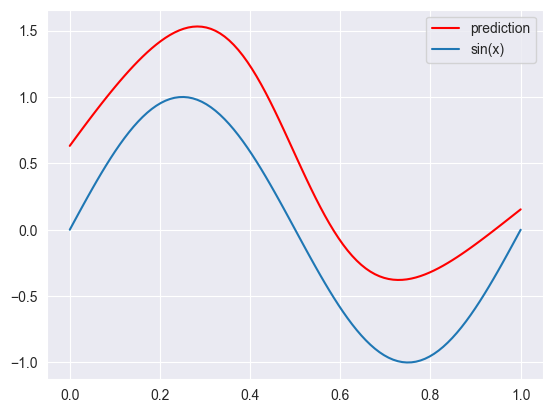

In [5]:
plt.plot(x, predict(x).data, label='prediction', color='red')
plt.plot(x, np.sin(2 * np.pi * x), label='sin(x)')
plt.legend(loc='best')

In [6]:
loss_trace

[array(0.84736959),
 array(0.25142863),
 array(0.24759485),
 array(0.2378612),
 array(0.21222231),
 array(0.16742181),
 array(0.09681933),
 array(0.07849528),
 array(0.0774973),
 array(0.07722132)]

variable(0.8473695850105871)
variable(0.6004598151124441)
variable(0.5608541317049301)
variable(0.5543321590937468)
variable(0.5532308847575004)
variable(0.552990067407093)
variable(0.5528865414937602)
variable(0.5528046462817284)
variable(0.5527260119904448)
variable(0.5526477067342384)


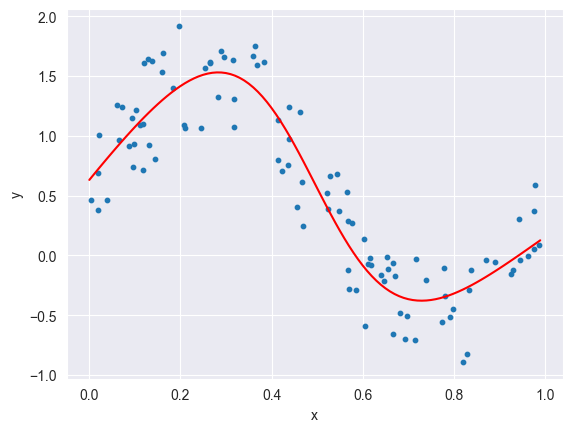

[array([[ 0.00049374,  0.00076255, -0.00058645, -0.00015645, -0.00045457,
        -0.00015734, -0.00042296,  0.00032137,  0.00051054, -0.00033646]]), array([[0.01282639, 0.01208932, 0.01564483, 0.0145206 , 0.01530573,
        0.01455243, 0.01524078, 0.01326771, 0.01275176, 0.01501145]]), array([[0.00318973, 0.00289423, 0.00448084, 0.00396882, 0.00431987,
        0.00394754, 0.00426921, 0.00340216, 0.00319184, 0.0041685 ]]), array([[0.00629082, 0.00587027, 0.0082486 , 0.00747413, 0.00800082,
        0.00741832, 0.00791027, 0.00661966, 0.00631773, 0.00776042]]), array([[0.00492007, 0.00458404, 0.00664888, 0.00596749, 0.00642534,
        0.00588804, 0.00632782, 0.00521906, 0.00497426, 0.00619914]]), array([[0.00543317, 0.00510299, 0.00729619, 0.00656417, 0.00705103,
        0.00645128, 0.00693004, 0.00576317, 0.00551908, 0.00679468]]), array([[0.00521261, 0.00491723, 0.00706329, 0.00633842, 0.00681539,
        0.00619845, 0.00667898, 0.00554839, 0.00532603, 0.00654789]]), array([[0.005286

In [7]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))


def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

W1_trace = []
b1_trace = []
W2_trace = []
b2_trace = []

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i < 10:
        W1_trace.append(W1.grad.data)
        b1_trace.append(b1.grad.data)
        W2_trace.append(W2.grad.data)
        b2_trace.append(b2.grad.data)

        print(loss)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

print(W1_trace)
print(b1_trace)
print(W2_trace)
print(b2_trace)


In [8]:
W1_trace

[array([[ 0.00049374,  0.00076255, -0.00058645, -0.00015645, -0.00045457,
         -0.00015734, -0.00042296,  0.00032137,  0.00051054, -0.00033646]]),
 array([[0.01282639, 0.01208932, 0.01564483, 0.0145206 , 0.01530573,
         0.01455243, 0.01524078, 0.01326771, 0.01275176, 0.01501145]]),
 array([[0.00318973, 0.00289423, 0.00448084, 0.00396882, 0.00431987,
         0.00394754, 0.00426921, 0.00340216, 0.00319184, 0.0041685 ]]),
 array([[0.00629082, 0.00587027, 0.0082486 , 0.00747413, 0.00800082,
         0.00741832, 0.00791027, 0.00661966, 0.00631773, 0.00776042]]),
 array([[0.00492007, 0.00458404, 0.00664888, 0.00596749, 0.00642534,
         0.00588804, 0.00632782, 0.00521906, 0.00497426, 0.00619914]]),
 array([[0.00543317, 0.00510299, 0.00729619, 0.00656417, 0.00705103,
         0.00645128, 0.00693004, 0.00576317, 0.00551908, 0.00679468]]),
 array([[0.00521261, 0.00491723, 0.00706329, 0.00633842, 0.00681539,
         0.00619845, 0.00667898, 0.00554839, 0.00532603, 0.00654789]]),
 ar

In [9]:

W2_trace[0]

array([[-0.54282533],
       [-0.5417361 ],
       [-0.54170276],
       [-0.54205306],
       [-0.54202334],
       [-0.54322167],
       [-0.54273785],
       [-0.54231241],
       [-0.54166427],
       [-0.54268599]])

In [10]:
W2_trace[0] *4

array([[-2.17130134],
       [-2.16694438],
       [-2.16681103],
       [-2.16821226],
       [-2.16809336],
       [-2.17288669],
       [-2.17095142],
       [-2.16924962],
       [-2.16665708],
       [-2.17074398]])

In [11]:
b2_trace[0] * 4

array([-4.3381535])